In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Just run 1 time

In [4]:
n_rows = 504
n_cols = 555

u = pd.read_csv('./release_gp_homework_data/OceanFlow/1u.csv', names=[i for i in range(0, n_cols)])
v = pd.read_csv('./release_gp_homework_data/OceanFlow/1v.csv', names=[i for i in range(0, n_cols)])

file_indexes = [i+1 for i in range(0, 100)]

for file_index in file_indexes[1:]:
    file_name_u = './release_gp_homework_data/OceanFlow/{}u.csv'.format(file_index)
    file_name_v = './release_gp_homework_data/OceanFlow/{}v.csv'.format(file_index)
    
    df_temp_u = pd.read_csv(file_name_u, names=[i for i in range(0, n_cols)])
    df_temp_v = pd.read_csv(file_name_v, names=[i for i in range(0, n_cols)])
    
    u = np.dstack([u, df_temp_u])
    v = np.dstack([v, df_temp_v])

# Problema 3a

In [42]:
n_puntos = 30
points = {}

sigma1 = 80
sigma2 = 120

for i in range(0, n_puntos):
    points['point_{}'.format(i)] = [np.random.normal(loc=100, scale=sigma1), np.random.normal(loc=350, scale=sigma2)]

In [43]:
simulation = {}

for point in [*points.keys()]:
    
    temp_list = []
    new_x = points[point][0]
    new_y = points[point][1]
    
    for time in range(0, 100):
        
        square_row = int(round(new_x))
        square_col = int(round(new_y))

        if (square_row <= n_rows-1) and (square_col <= n_cols-1):
            vel_u = u[square_row, square_col, time]
            vel_v = v[square_row, square_col, time]
        else:
            vel_u = 0
            vel_v = 0
        
        new_x = new_x + 3*vel_v
        new_y = new_y + 3*vel_u
    
        temp_list.append(np.array([new_x, new_y]))
    simulation[point] = temp_list

In [44]:
df_mask = pd.read_csv('./release_gp_homework_data/OceanFlow/mask.csv', names = [i for i in range(0, n_cols)])

def plot_map_at_time(time):
    df_mask2 = df_mask.copy()
        
    for point in [*points.keys()]:
        x_ = simulation[point][time][0]
        y_ = simulation[point][time][1]
        df_mask2.loc[(x_-5):(x_+5), (y_-5):(y_+5)] = 0.6*int(point.replace('point_',''))/n_puntos + 0.2

    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.heatmap(df_mask2, cmap='viridis')
    plt.title('Simulation  at time t + {} hrs | sigma1={}, sigma2={}'.format(3*(time+1), sigma1, sigma2))
    plt.show()

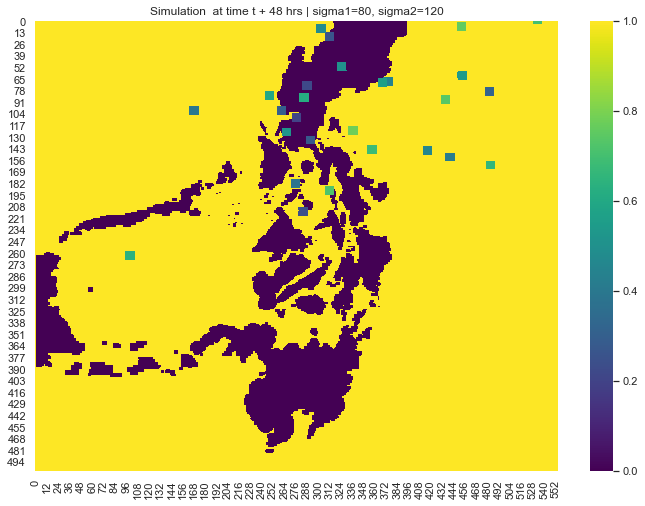

In [45]:
plot_map_at_time(15)

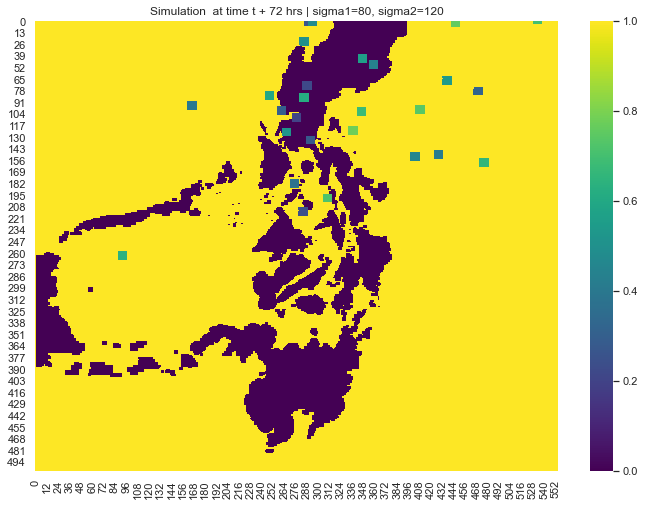

In [46]:
plot_map_at_time(23)

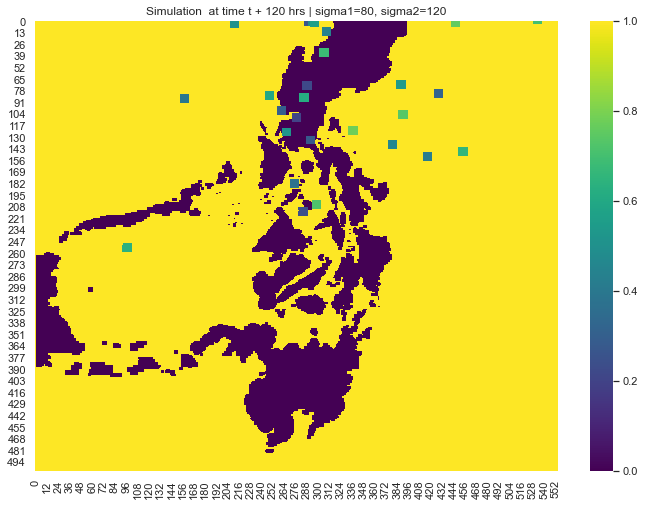

In [47]:
plot_map_at_time(39)

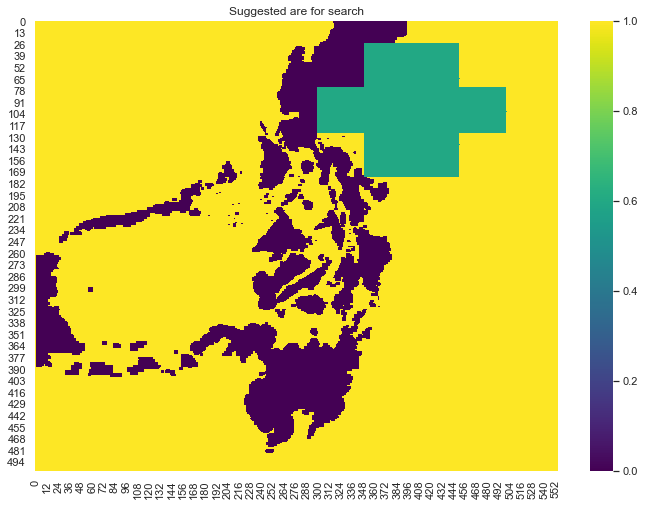

In [61]:
df_mask2 = df_mask.copy()
x_ = 100
y_ = 350
df_mask2.loc[(x_-25):(x_+25), (y_-50):(y_+150)] = 0.6

x_ = 50
y_ = 400
df_mask2.loc[(x_-25):(x_+25), (y_-50):(y_+50)] = 0.6

x_ = 150
y_ = 400
df_mask2.loc[(x_-25):(x_+25), (y_-50):(y_+50)] = 0.6

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_mask2, cmap='viridis')
plt.title('Suggested are for search')
plt.show()